# Persistence Images

Persistence Images were first introduced in [Adams et al, 2017](http://www.jmlr.org/papers/volume18/16-337/16-337.pdf). Much of this work, and examples contained herein are inspired by the work of [Obayashi and Hiraoka, 2017](https://arxiv.org/abs/1706.10082). Choices of weightings and general methods can be derived from [Kusano, Fukumizu, and Yasuaki Hiraoka, 2016](https://arxiv.org/abs/1601.01741).

In [1]:
from itertools import product

import time
import numpy as np
from sklearn import datasets
from scipy.stats import multivariate_normal as mvn
import matplotlib.pyplot as plt

from ripser import Rips
from persim import PersistenceImager

## The PersistenceImager() Class

In [2]:
# Printing a PersistenceImager() object will print its defining attributes
pimgr = PersistenceImager(pixel_size=0.2, birth_range=(0,1))
print(pimgr)

PersistenceImager(birth_range=(0.0, 1.0), pers_range=(0.0, 1.0), pixel_size=0.2, weight=persistence, weight_params={'n': 1.0}, kernel=gaussian, kernel_params={'sigma': [[1.0, 0.0], [0.0, 1.0]]})


In [3]:
# PersistenceImager() attributes can be adjusted at or after instantiation.
# Updating attributes of a PersistenceImager() object will automatically update all other dependent attributes.
pimgr.pixel_size = 0.1
pimgr.birth_range = (0, 2)
print(pimgr)
print(pimgr.resolution)

PersistenceImager(birth_range=(0.0, 2.0), pers_range=(0.0, 1.0), pixel_size=0.1, weight=persistence, weight_params={'n': 1.0}, kernel=gaussian, kernel_params={'sigma': [[1.0, 0.0], [0.0, 1.0]]})
(20, 10)


In [4]:
# The `fit()` method can be called on one or more (*,2) numpy arrays to automatically determine the miniumum birth and 
# persistence ranges needed to capture all persistence pairs. The ranges and resolution are automatically adjusted to 
# accomodate the specified pixel size.
pimgr = PersistenceImager(pixel_size=0.5)
pdgms = [np.array([[0.5, 0.8], [0.7, 2.2], [2.5, 4.0]]),
         np.array([[0.1, 0.2], [3.1, 3.3], [1.6, 2.9]]),
         np.array([[0.2, 1.5], [0.4, 0.6], [0.2, 2.6]])]
pimgr.fit(pdgms, skew=True)
print(pimgr)
print(pimgr.resolution)

PersistenceImager(birth_range=(0.1, 3.1), pers_range=(-8.326672684688674e-17, 2.5), pixel_size=0.5, weight=persistence, weight_params={'n': 1.0}, kernel=gaussian, kernel_params={'sigma': [[1.0, 0.0], [0.0, 1.0]]})
(6, 5)


In [5]:
# The `transform()` method can then be called on one or more (*,2) numpy arrays to generate persistence images from diagrams.
# The option `skew=True` specifies that the diagrams are currently in birth-death coordinates and must first be transformed 
# to birth-persistence coordinates.
pimgs = pimgr.transform(pdgms, skew=True)
pimgs[0]

array([[0.03999068, 0.05688393, 0.06672051, 0.06341749, 0.04820814],
       [0.04506697, 0.06556791, 0.07809764, 0.07495246, 0.05730671],
       [0.04454486, 0.06674611, 0.08104366, 0.07869919, 0.06058808],
       [0.04113063, 0.0636504 , 0.07884635, 0.07747833, 0.06005714],
       [0.03625436, 0.05757744, 0.07242608, 0.07180125, 0.05593626],
       [0.02922239, 0.04712024, 0.05979033, 0.05956698, 0.04653357]])

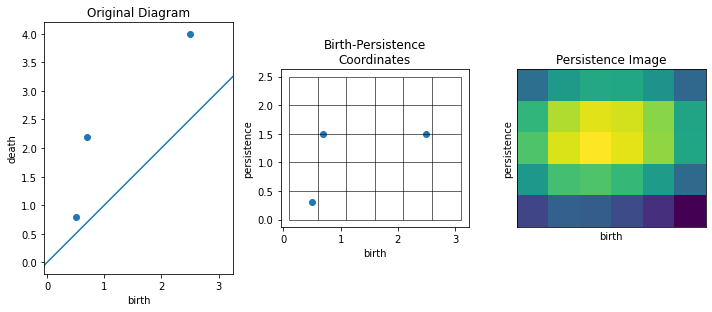

In [6]:
# The `plot_diagram()` and `plot_image()` methods can be used to visualize persistence diagrams and images
fig, axs = plt.subplots(1, 3, figsize=(10,5))

axs[0].set_title("Original Diagram")
pimgr.plot_diagram(pdgms[0], skew=False, ax=axs[0])

axs[1].set_title("Birth-Persistence\nCoordinates")
pimgr.plot_diagram(pdgms[0], skew=True, ax=axs[1])

axs[2].set_title("Persistence Image")
pimgr.plot_image(pimgs[0], ax=axs[2])

plt.tight_layout()

(16384, 3)
Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


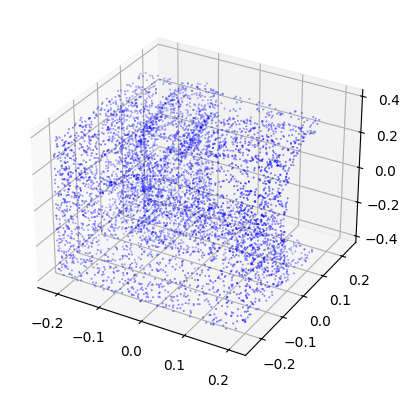

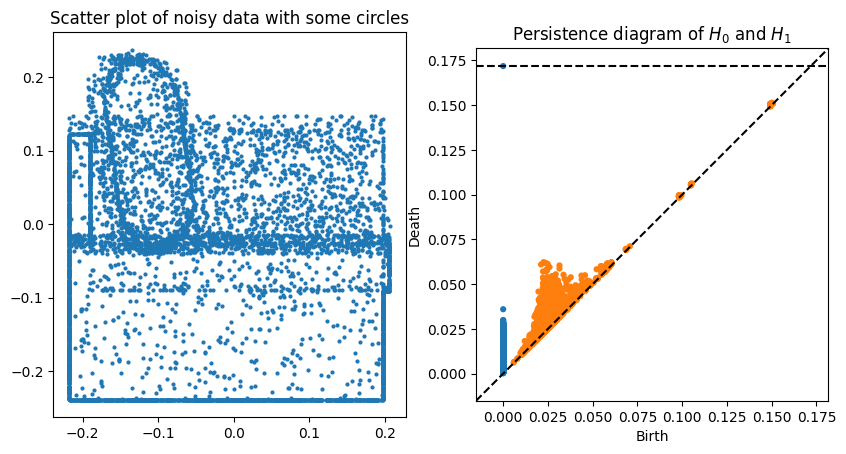

In [3]:
import open3d as o3d
import numpy as np

# Path to the PCD file
pcd_file_path = "../data/PCN/1af92afe68b3f837f51f77a6d7299806.pcd"

# Read the PCD file
pcd = o3d.io.read_point_cloud(pcd_file_path)

# Convert to NumPy array
points = np.asarray(pcd.points)

data = points

print(data.shape)

downsampled_indices = np.random.choice(points.shape[0], 6000, replace=False)
downsampled_points = points[downsampled_indices]
data = downsampled_points

rips = Rips()
dgms = rips.fit_transform(data)
H0_dgm = dgms[0]
H1_dgm = dgms[1]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c='b', marker='o', s=0.1)

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.scatter(data[:,0], data[:,1], s=4)
plt.title("Scatter plot of noisy data with some circles")

plt.subplot(122)
rips.plot(dgms, legend=False, show=False)
plt.title("Persistence diagram of $H_0$ and $H_1$")
plt.show()

## Generate a persistence diagram using Ripser

(36, 5000, 3)
(5400, 4000, 3)
(5400, 4000, 3)
(36, 4000, 3)
(5000, 3)
Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


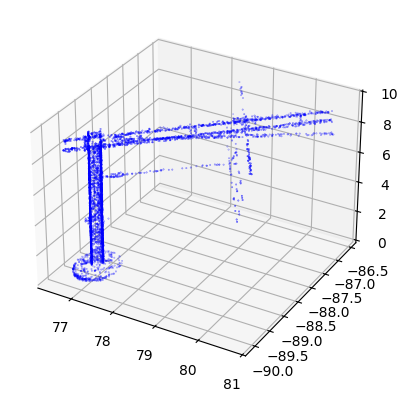

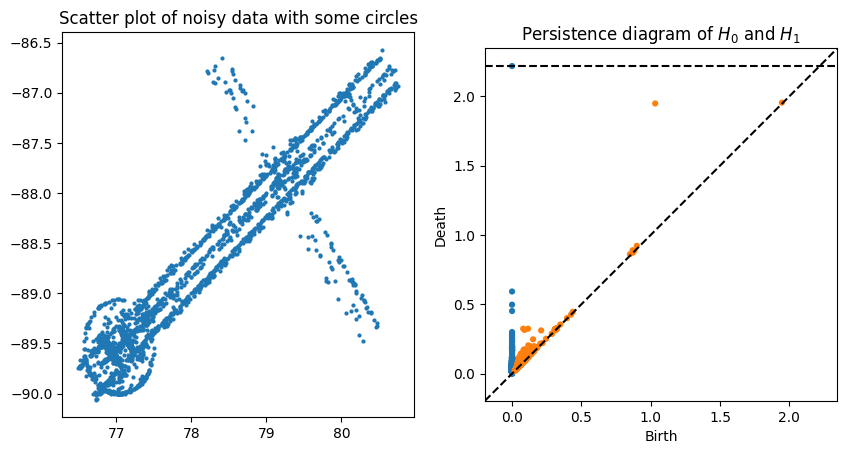

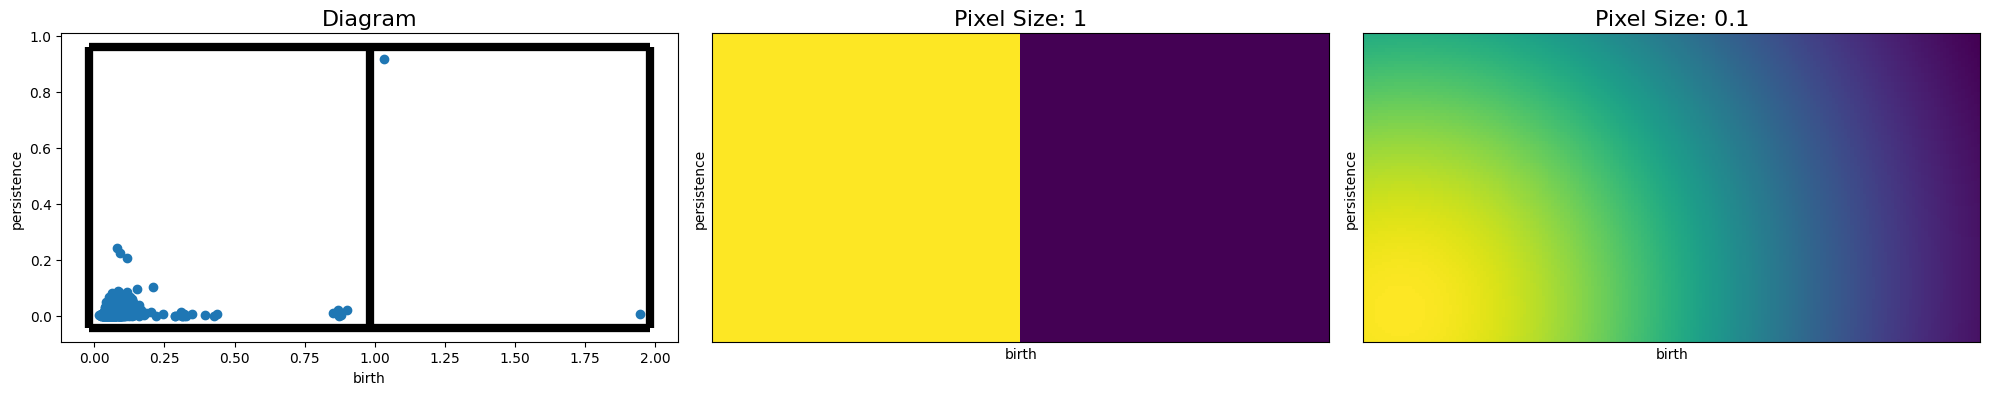

In [25]:
import h5py
import os

def load_h5(file_path, dataset_name):
    with h5py.File(file_path, 'r') as hf:
        array = hf[dataset_name][:]
    return array

npy_folder_path = '../data/Dutch/easy_0.8'

complete = load_h5(os.path.join(npy_folder_path, "complete.h5"), "complete")
occl = load_h5(os.path.join(npy_folder_path, "occl.h5"), "occl")
non_sparse = load_h5(os.path.join(npy_folder_path, "non_sparse.h5"), "non_sparse")
uni_sparse = load_h5(os.path.join(npy_folder_path, "uni_sparse.h5"), "uni_sparse")

print(complete.shape)
print(occl.shape)
print(non_sparse.shape)
print(uni_sparse.shape)

data = complete[5]

print(data.shape)

rips = Rips()
dgms = rips.fit_transform(data)
H0_dgm = dgms[0]
H1_dgm = dgms[1]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c='b', marker='o', s=0.1)

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.scatter(data[:,0], data[:,1], s=4)
plt.title("Scatter plot of noisy data with some circles")

plt.subplot(122)
rips.plot(dgms, legend=False, show=False)
plt.title("Persistence diagram of $H_0$ and $H_1$")
plt.show()

# The resolution of the persistence image is adjusted by choosing the pixel size, given in the same units as the diagram
pimgr = PersistenceImager(pixel_size=1)
pimgr.fit(H1_dgm)

fig, axs = plt.subplots(1, 3, figsize=(20,5))
pimgr.plot_diagram(H1_dgm, skew=True, ax=axs[0])
axs[0].set_title('Diagram', fontsize=16)

pimgr.plot_image(pimgr.transform(H1_dgm), ax=axs[1])
axs[1].set_title('Pixel Size: 1', fontsize=16)

pimgr.pixel_size = 0.01 
pimgr.plot_image(pimgr.transform(H1_dgm), ax=axs[2])
axs[2].set_title('Pixel Size: 0.1', fontsize=16)

plt.tight_layout()

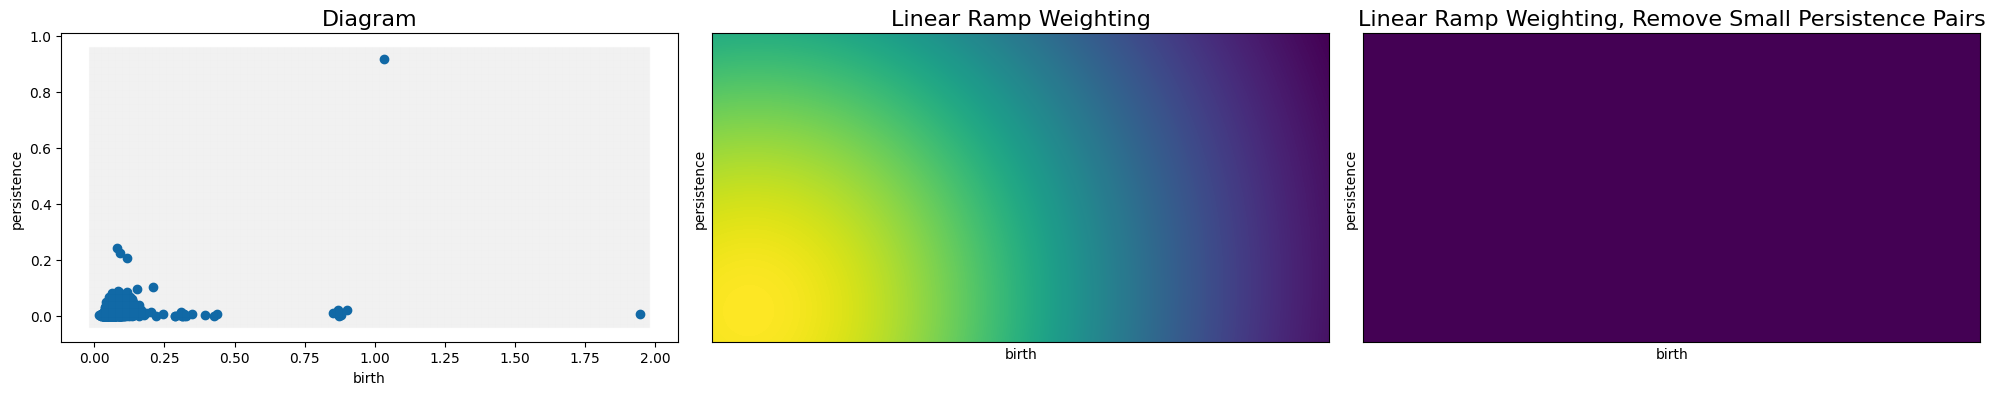

In [40]:
# We first import one of the implemented weighting functions, a peicewise linear ramp
from persim.images_weights import linear_ramp

pimgr.pixel_size = 0.001
pimgr.weight = linear_ramp
pimgr.weight_params = {'low':0.0, 'high':10, 'start':0.0, 'end':2.0}

fig, axs = plt.subplots(1, 3, figsize=(20,5))
pimgr.plot_diagram(H1_dgm, skew=True, ax=axs[0])
axs[0].set_title('Diagram', fontsize=16)

pimgr.plot_image(pimgr.transform(H1_dgm), ax=axs[1])
axs[1].set_title('Linear Ramp Weighting', fontsize=16)

pimgr.weight_params = {'low':0.0, 'high':1.0, 'start':2.0, 'end':10.0} 
pimgr.plot_image(pimgr.transform(H1_dgm), ax=axs[2])
axs[2].set_title('Linear Ramp Weighting, Remove Small Persistence Pairs', fontsize=16)

plt.tight_layout()

## Modify the Image Resolution

(500, 2)
Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


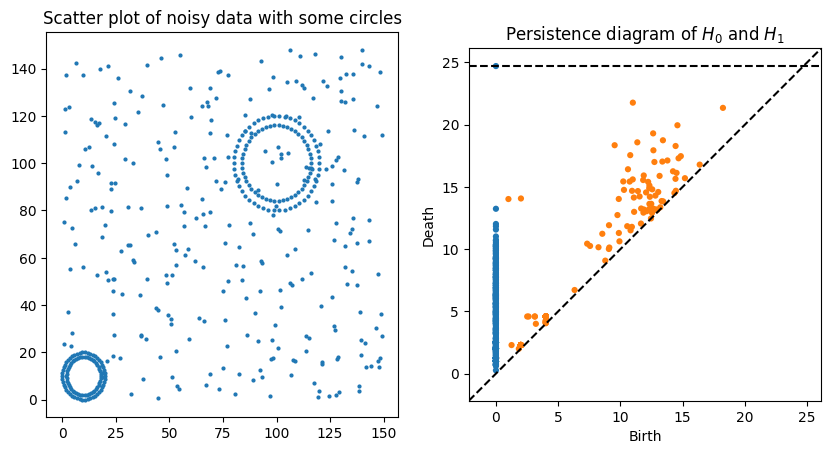

3.3333333333333335


In [14]:
# lots of random noise and 2 circles
data = np.concatenate([150 * np.random.random((300,2)), 
                       10 + 10 * datasets.make_circles(n_samples=100)[0],
                       100 + 20 * datasets.make_circles(n_samples=100)[0]])

print(data.shape)

rips = Rips()
dgms = rips.fit_transform(data)
H0_dgm = dgms[0]
H1_dgm = dgms[1]

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.scatter(data[:,0], data[:,1], s=4)
plt.title("Scatter plot of noisy data with some circles")

plt.subplot(122)
rips.plot(dgms, legend=False, show=False)
plt.title("Persistence diagram of $H_0$ and $H_1$")
plt.show()

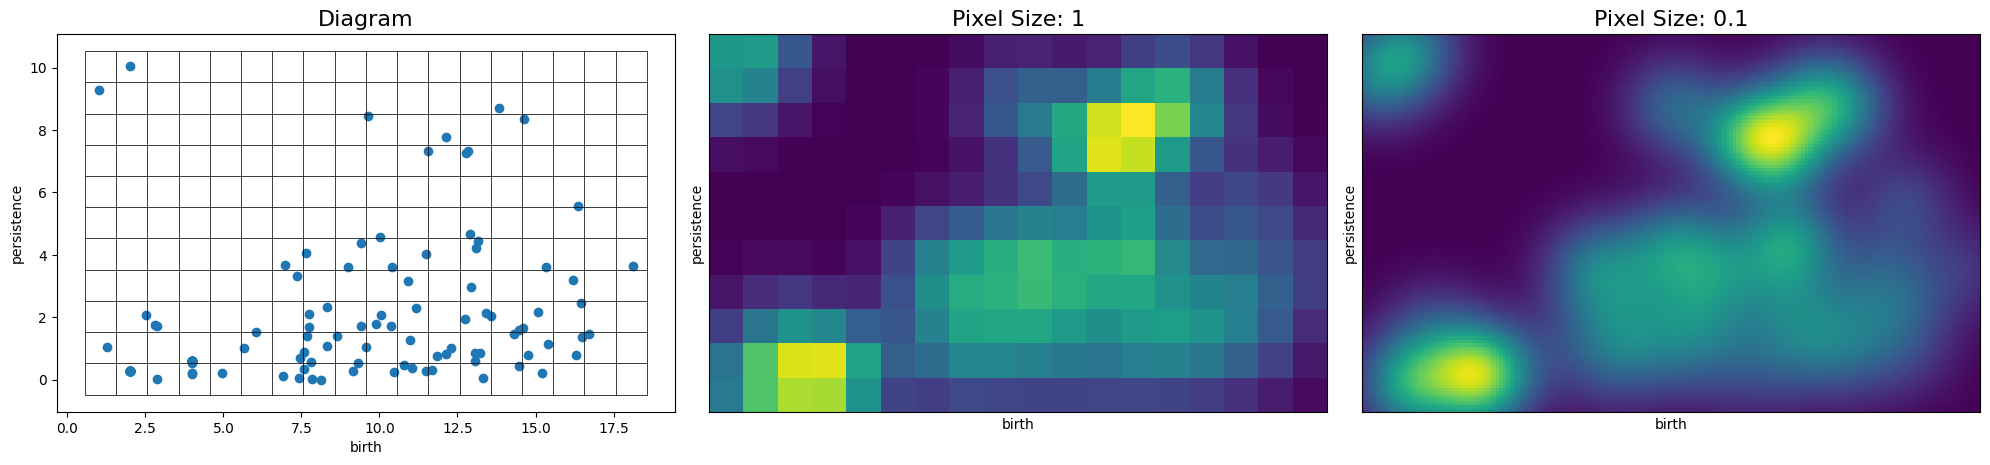

In [23]:
# The resolution of the persistence image is adjusted by choosing the pixel size, given in the same units as the diagram
pimgr = PersistenceImager(pixel_size=1)
pimgr.fit(H1_dgm)

fig, axs = plt.subplots(1, 3, figsize=(20,5))
pimgr.plot_diagram(H1_dgm, skew=True, ax=axs[0])
axs[0].set_title('Diagram', fontsize=16)

pimgr.plot_image(pimgr.transform(H1_dgm), ax=axs[1])
axs[1].set_title('Pixel Size: 1', fontsize=16)

pimgr.pixel_size = 0.1 
pimgr.plot_image(pimgr.transform(H1_dgm), ax=axs[2])
axs[2].set_title('Pixel Size: 0.1', fontsize=16)

plt.tight_layout()

## Modify the Weight function and parameters

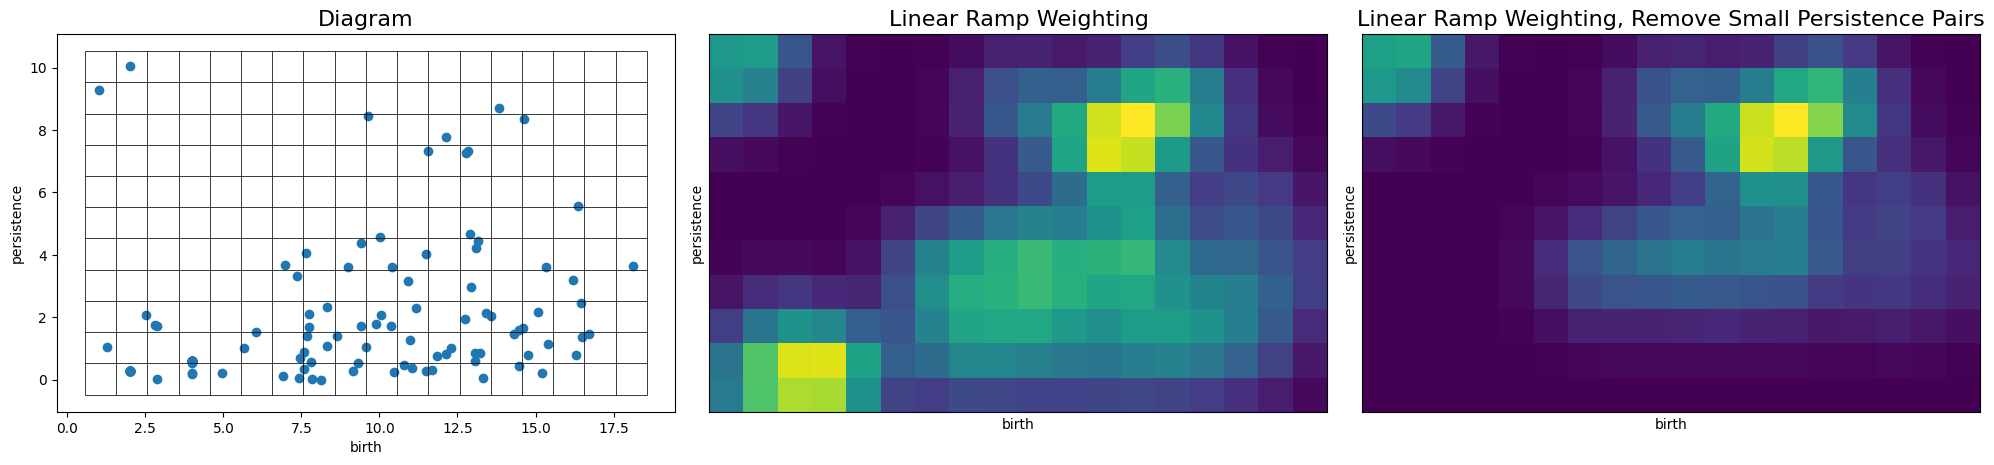

In [24]:
# We first import one of the implemented weighting functions, a peicewise linear ramp
from persim.images_weights import linear_ramp

pimgr.pixel_size = 1 
pimgr.weight = linear_ramp
pimgr.weight_params = {'low':0.0, 'high':1.0, 'start':0.0, 'end':10.0}

fig, axs = plt.subplots(1, 3, figsize=(20,5))
pimgr.plot_diagram(H1_dgm, skew=True, ax=axs[0])
axs[0].set_title('Diagram', fontsize=16)

pimgr.plot_image(pimgr.transform(H1_dgm), ax=axs[1])
axs[1].set_title('Linear Ramp Weighting', fontsize=16)

pimgr.weight_params = {'low':0.0, 'high':1.0, 'start':2.0, 'end':10.0} 
pimgr.plot_image(pimgr.transform(H1_dgm), ax=axs[2])
axs[2].set_title('Linear Ramp Weighting, Remove Small Persistence Pairs', fontsize=16)

plt.tight_layout()

## Modify the Persistence Pair Kernel

Reduce the standard deviate of the isotropic Gaussian kernel used. 

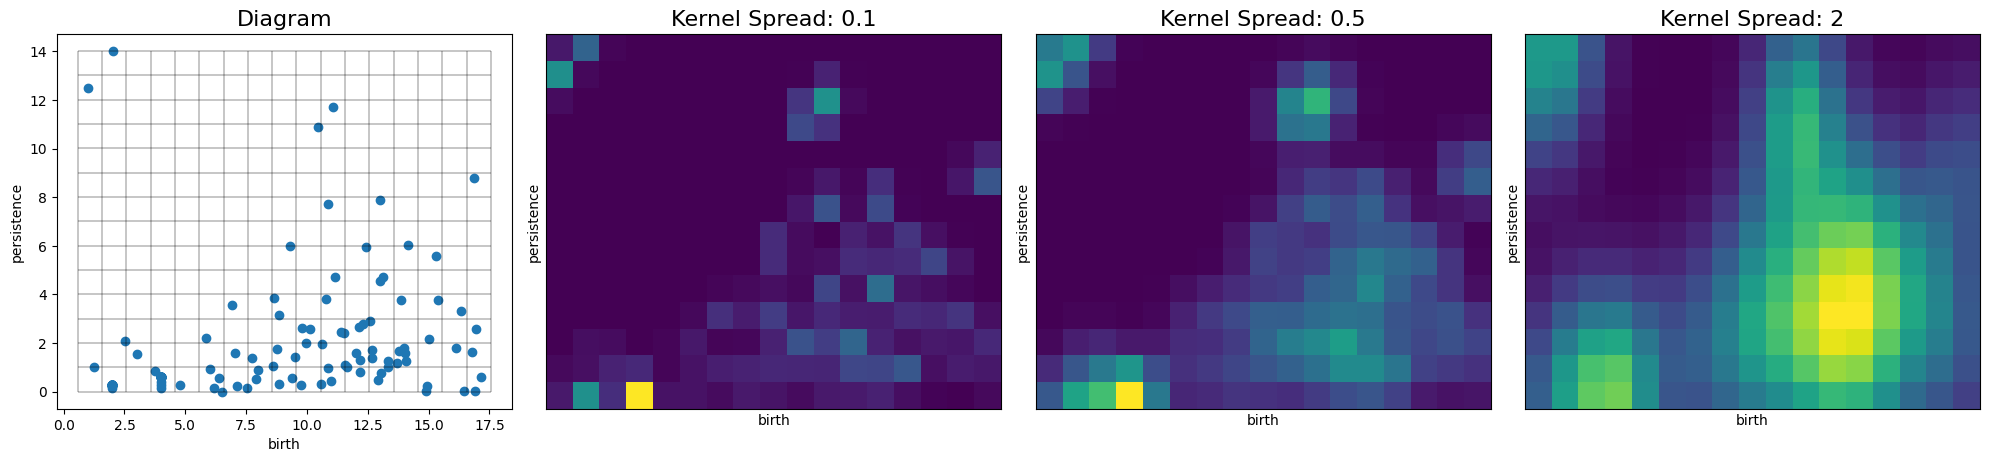

In [10]:
# For the default bivariate normal Gaussian kernel, the parameter controlling the spread (sigma) may be specified 
# either by a float or a 2x2 covariance matrix
pimgr = PersistenceImager(pixel_size=1)
pimgr.fit(H1_dgm)

fig, axs = plt.subplots(1, 4, figsize=(20,5))
pimgr.kernel_params = {'sigma': .1}
pimgr.plot_diagram(H1_dgm, skew=True, ax=axs[0])
axs[0].set_title('Diagram', fontsize=16)

pimgr.kernel_params = {'sigma': 0.1}
pimgr.plot_image(pimgr.transform(H1_dgm), ax=axs[1])
axs[1].set_title('Kernel Spread: 0.1', fontsize=16)

pimgr.kernel_params = {'sigma': .5}
pimgr.plot_image(pimgr.transform(H1_dgm), ax=axs[2])
axs[2].set_title('Kernel Spread: 0.5', fontsize=16)

# Non-isotropic, standard bivariate Gaussian with greater spread along the persistence axis
pimgr.kernel_params = {'sigma': np.array([[1, 0],[0, 6]])}
pimgr.plot_image(pimgr.transform(H1_dgm), ax=axs[3])
axs[3].set_title('Kernel Spread: 2', fontsize=16)

plt.tight_layout()

<AxesSubplot:xlabel='birth', ylabel='persistence'>

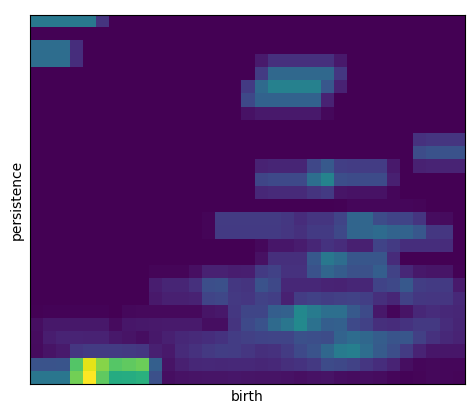

In [11]:
# A valid kernel is a python function of the form kernel(x, y, mu=(birth, persistence), **kwargs) defining a 
# cumulative distribution function such that kernel(x, y) = P(X <= x, Y <=y), where x and y are numpy arrays of equal length. 
# The required parameter mu defines the dependance of the kernel on the location of a persistence pair and is usually 
# taken to be the mean of the probability distribution function associated to kernel CDF.

# Example of a custom kernel which defines the cumulative distribution function for the uniform probability density 
# with value 1/(width*height) over the region [mu[0]-width/2, mu[0]+width/2] x [mu[1]-height/2, mu[1]+height/2]
def uniform_kernel(x, y, mu=None, width=1, height=1):
    w1 = np.maximum(x - (mu[0] - width/2), 0)
    h1 = np.maximum(y - (mu[1] - height/2), 0)
    
    w = np.minimum(w1, width)
    h = np.minimum(h1, height)

    return w*h / (width*height)

# Construct a PersistenceImager() object that uses the uniform distribution kernel supported on a rectangular region
pimgr = PersistenceImager(pixel_size=.5, kernel=uniform_kernel, kernel_params={'width': 3, 'height': 1})
pimgr.fit(H1_dgm)
pimgr.plot_image(pimgr.transform(H1_dgm))

## Parallelization

In [14]:
# For diagrams with small numbers of persistence pairs, overhead costs may not justify parallelization
# Also, initial run of job in parallel is very costly. Run twice to see speed gains.
import time
num_diagrams = 100
min_pairs = 50
max_pairs = 100

pimgr = PersistenceImager()
dgms = [np.random.rand(np.random.randint(min_pairs, max_pairs), 2) for _ in range(num_diagrams)]

pimgr.fit(dgms)

start_time = time.time()
pimgr.transform(dgms)
print("Execution time in serial: %g sec." % (time.time() - start_time))

start_time = time.time()
pimgr.transform(dgms, n_jobs=-1)
print("Execution time in parallel: %g sec." % (time.time() - start_time))

Execution time in serial: 0.159616 sec.
Execution time in parallel: 0.143826 sec.


In [15]:
# For larger diagrams, speed up can be significant
import time
num_diagrams = 100
min_pairs = 500
max_pairs = 1000

pimgr = PersistenceImager()
dgms = [np.random.rand(np.random.randint(min_pairs, max_pairs), 2) for _ in range(num_diagrams)]

pimgr.fit(dgms)

start_time = time.time()
pimgr.transform(dgms)
print("Execution time in serial: %g sec." % (time.time() - start_time))

start_time = time.time()
pimgr.transform(dgms, n_jobs=-1)
print("Execution time in parallel: %g sec." % (time.time() - start_time))

Execution time in serial: 1.51495 sec.
Execution time in parallel: 0.442808 sec.
